In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def image_preporcess(img_path, target_size):
    # 以灰度图的形式读入图片
    image = cv2.imread(img_path, 0)
    
    # resize 尺寸
    ih, iw = target_size
    # 原始图片尺寸
    h,  w = image.shape

    # 计算缩放后图片尺寸
    scale = min(iw/w, ih/h)
    nw, nh = int(scale * w), int(scale * h)
    image_resized = cv2.resize(image, (nw, nh))

    # 创建一张画布，画布的尺寸就是目标尺寸
    # fill_value=120为灰色画布
    image_paded = np.full(shape=[ih, iw], fill_value=120)
    dw, dh = (iw - nw) // 2, (ih-nh) // 2

    # 将缩放后的图片放在画布中央
    image_paded[dh:nh+dh, dw:nw+dw] = image_resized
    
    # 归一化处理
    image_paded = image_paded / 255.

    return image_paded

if __name__=="__main__":
    # TODO cv2.imread(image_path, 0) 读取灰度图像
    image_path = "/Users/liuliangjun/PycharmProjects/vance/images/dogAndCat/train/cat.0.jpg"
    img=image_preporcess(image_path,(100,100))
    plt.imshow(img)

In [ ]:
from glob import glob
image_path = '/Users/liuliangjun/PycharmProjects/vance/images/dogAndCat/train/*'

x = []
y = []
for i in glob(image_path):
    y.append(i.split('.')[0].split('/')[-1])
    x.append(image_preporcess(i,(100,100)))

x = np.array(x)
y = np.array(y)

In [ ]:
y = np.array([1 if i =='dog' else 0 for i in y])

In [12]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape

model = models.Sequential()

# 定义输入层 输入图片为100*100像素
model.add(Reshape((48, 256, 1), input_shape=(48, 256)))

# 进行三次卷积和池化
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 进行flatten
model.add(Flatten())

# 添加全连接层
model.add(Dense(units=50, activation='relu'))

# 再添加一层全连接层作为输出层
model.add(Dense(units=2, activation='sigmoid'))

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 48, 256, 1)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 46, 254, 32)       320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 23, 127, 32)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 21, 125, 64)       18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 10, 62, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 60, 128)        73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 30, 128)       

In [ ]:
# 训练将近一个小时
model.fit(x, y, batch_size=50, epochs=10)

In [ ]:
image_path = "/Users/liuliangjun/PycharmProjects/vance/images/dogAndCat/test/192.jpg"
img=image_preporcess(image_path,(100,100))
plt.imshow(img)


model.predict_classes(np.expand_dims(img, 0))
# 1是狗、0是猫

In [ ]:
# 模型保存，一个小时的成果赶紧保存
model.save('cats.h5')

In [5]:
# 加载保存的模型 
!export TF_CPP_MIN_LOG_LEVEL=2  # 屏蔽警告信息

new_model = keras.models.load_model('cats.h5')

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 100, 100, 1)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 128)      

array([0])

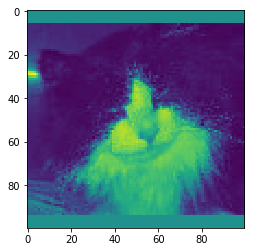

In [15]:
image_path = "/Users/liuliangjun/PycharmProjects/vance/images/dogAndCat/test/189.jpg"
img=image_preporcess(image_path,(100,100))
plt.imshow(img)


new_model.predict_classes(np.expand_dims(img, 0))